In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv ('Hospital_Data.csv')
df.head()



,ProviderID,HospitalName,Address,City,State,ZIPCode,CountyName,PhoneNumber,HospitalType,HospitalOwnership,...,Patientexperiencenationalcomparison,Patientexperiencenationalcomparisonfootnote,Effectivenessofcarenationalcomparison,Effectivenessofcarenationalcomparisonfootnote,Timelinessofcarenationalcomparison,Timelinessofcarenationalcomparisonfootnote,Efficientuseofmedicalimagingnationalcomparison,Efficientuseofmedicalimagingnationalcomparisonfootnote,Location,filter_$
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH BOAZ, AL",1
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE FORT PAYNE, AL",1
2,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Hospital District or Authority,...,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET GREENSBORO, AL",1
3,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE HUNTSVILLE, AL",1
4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Acute Care Hospitals,Tribal,...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,"PO BOX 287 BETHEL, AK",1


In [18]:
df.columns
dfb=pd.DataFrame(df, columns=['ProviderID', 'HospitalName', 'State', 'HospitalType', 'HospitalOwnership', 'EmergencyServices', 
                              'Hospitaloverallrating'])
dfb.head()

,ProviderID,HospitalName,State,HospitalType,HospitalOwnership,EmergencyServices,Hospitaloverallrating
0,10005,MARSHALL MEDICAL CENTER SOUTH,AL,Acute Care Hospitals,Government - Hospital District or Authority,1,2
1,10012,DEKALB REGIONAL MEDICAL CENTER,AL,Acute Care Hospitals,Proprietary,1,3
2,10095,HALE COUNTY HOSPITAL,AL,Acute Care Hospitals,Government - Hospital District or Authority,1,3
3,10131,CRESTWOOD MEDICAL CENTER,AL,Acute Care Hospitals,Proprietary,1,2
4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,AK,Acute Care Hospitals,Tribal,1,3


In [8]:
# descriptives for hospital overall ratings
dfb['Hospitaloverallrating'].describe()

count    3675.000000
mean        3.151020
std         1.068577
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospitaloverallrating, dtype: float64

In [40]:
# number of rows and columns
print(len(df))
print(len(df.columns))

3675
30


In [9]:
# number of hospitals in each rating score, sorted
rating_count = dfb['Hospitaloverallrating'].value_counts() 
print(rating_count)

3    1178
4    1153
2     750
5     335
1     259
Name: Hospitaloverallrating, dtype: int64


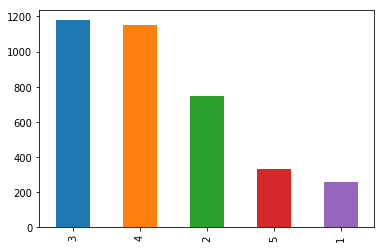

In [10]:
# bar chart for number of hospitals in each rating score (from 1 to 5)
from pandas import Series,DataFrame
rating_count.plot(kind='bar')

In [11]:
# number of hospitals in each type
# Acute care hospital: for patients of average inpatient length stay greater than 25 days
# Critical access hospitals: smaller, limited services to people in rural areas receiving cost based reimbursements
type_count = dfb['HospitalType'].value_counts()
print(type_count)

Acute Care Hospitals         3025
Critical Access Hospitals     650
Name: HospitalType, dtype: int64


In [12]:
#reformat type_count into a dataframe for visualizing purposes below
type(type_count)
type_count = pd.DataFrame(type_count)
type_count.reset_index(level=0, inplace=True)
type_count.columns = ['HospitalType', 'count']
type_count

,HospitalType,count
0,Acute Care Hospitals,3025
1,Critical Access Hospitals,650


In [14]:
# number of hospitals in each type of hospital ownership
ownership_count = dfb['HospitalOwnership'].value_counts()
print(ownership_count)

A    1699
B     634
C     360
D     332
E     299
F     259
G      43
H      29
I      16
J       4
Name: HospitalOwnership, dtype: int64


In [50]:
#reformat ownership_count as pandas df for visualizing purposes below
ownership_count = pd.DataFrame([ownership_count])
ownership_count = ownership_count.T
ownership_count.reset_index(level=0, inplace=True)
ownership_count.columns
ownership_count.columns = ['HospitalOwnership','NumberofHospitals']
ownership_count

,HospitalOwnership,NumberofHospitals
0,Volun NP Private,1699
1,Proprietary,634
2,Volun NP Other,360
3,Govt-HospDistrict,332
4,Volunt NP Church,299
5,Govt-Local,259
6,Govt-State,43
7,Physician,29
8,Govt-Federal,16
9,Tribal,4


In [51]:
# bar chart for number of hospitals in each ownership type
# Voluntary Non Profit Private has the most number of hospitals, Govertment-Federal & Tribal have the least
import plotly
import plotly.plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
ownership = [go.Bar(x=ownership_count['HospitalOwnership'],
               y=ownership_count['NumberofHospitals'], width = 0.4, marker=dict(color='teal'))]
iplot(ownership)

In [52]:
emergency_count = dfb['EmergencyServices'].value_counts()
emergency_count = pd.DataFrame([emergency_count])
emergency_count = emergency_count.T
emergency_count
emergency_count.reset_index(level=0, inplace=True)
emergency_count.columns = ['EmergencyServices','NumberofHospitals']
emergency_count

,EmergencyServices,NumberofHospitals
0,1,3500
1,0,175


In [54]:
#from plotly.offline import init_notebook_mode, iplot
#from plotly.graph_objs import *
#init_notebook_mode(connected=True) 

emergency = [go.Bar(x=emergency_count['EmergencyServices'],
               y=emergency_count['NumberofHospitals'], width = [0.2, 0.2], marker=dict(color='teal'))]
iplot(emergency)
# most hospitals have emergency services

In [55]:
state_count = dfb['State'].value_counts()
state_count = pd.DataFrame(state_count)
#type(state_count)
#state_count.columns
state_count.reset_index(level=0, inplace=True)
state_count
state_count.columns = ['State','NumberofHospitals']
state_count

,State,NumberofHospitals
0,CA,291
1,TX,271
2,FL,168
3,IL,161
4,NY,150
5,PA,148
6,OH,144
7,MI,117
8,IN,114
9,WI,107


In [56]:
ratings_state = dfb.groupby('State', as_index=False)['Hospitaloverallrating'].mean()
ratings_state

,State,Hospitaloverallrating
0,AK,3.100000
1,AL,2.975309
2,AR,2.767857
3,AZ,3.105263
4,CA,2.896907
5,CO,3.769231
6,CT,2.892857
7,DC,1.714286
8,DE,3.833333
9,FL,2.464286


In [57]:
# South Dakota is the state with highest mean hospital ratings
ratings_state[ratings_state['Hospitaloverallrating']==ratings_state['Hospitaloverallrating'].max()]

,State,Hospitaloverallrating
43,SD,4.117647


In [22]:
# Puerto Rico is the territory with lowest mean hospital ratings
ratings_state[ratings_state['Hospitaloverallrating']==ratings_state['Hospitaloverallrating'].min()]

,State,Hospitaloverallrating
40,PR,1.666667


In [17]:
ratings_type = dfb.groupby('HospitalType', as_index=False)['Hospitaloverallrating'].mean()
ratings_type

,HospitalType,Hospitaloverallrating
0,Acute Care Hospitals,3.075372
1,Critical Access Hospitals,3.503077


In [33]:
ratings_ownership = dfc.groupby('HospitalOwnership', as_index=False)['Hospitaloverallrating'].mean()
ratings_ownership

,HospitalOwnership,Hospitaloverallrating
0,Govt-Federal,2.500000
1,Govt-HospDistrict,3.060241
2,Govt-Local,3.092664
3,Govt-State,2.744186
4,Physician,4.000000
5,Proprietary,2.821767
6,Tribal,3.250000
7,Volun NP Other,3.341667
8,Volun NP Private,3.238376
9,Volunt NP Church,3.284281


In [34]:
# physician owned hospitals have highest mean overall ratings
ratings_ownership[ratings_ownership['Hospitaloverallrating']==ratings_ownership['Hospitaloverallrating'].max()]

,HospitalOwnership,Hospitaloverallrating
4,Physician,4.0


In [35]:
ratings_ownership[ratings_ownership['Hospitaloverallrating']==ratings_ownership['Hospitaloverallrating'].min()]
# government-federal owned hospitals have lowest mean overall ratings


,HospitalOwnership,Hospitaloverallrating
0,Govt-Federal,2.5


Text(0,0.5,'Hospital Overall Rating')

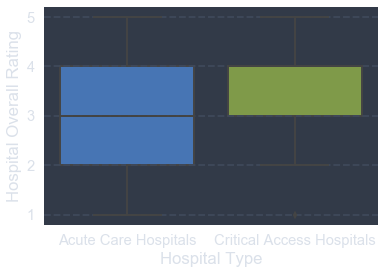

In [37]:
#from jupyterthemes import jtplot
#jtplot.style(theme='chesterish')
#jtplot.style(context='talk', gridlines='--',figsize=(10, 8.5))

# Box plots for Hopsital Type's overall rating
import seaborn as sns
%matplotlib inline
sns.boxplot(x='HospitalType', y='Hospitaloverallrating', data=dfb) 
plt.xlabel("Hospital Type")
plt.ylabel('Hospital Overall Rating')

Text(0,0.5,'Hospital Overall Rating')

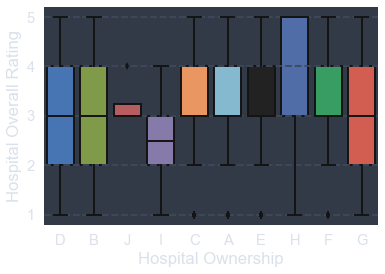

In [31]:
#from jupyterthemes import jtplot
#jtplot.style(theme='chesterish')
#jtplot.style(context='talk', gridlines='--',figsize=(10, 8.5))
# boxplots for Hospital Ownership's overall rating
%matplotlib inline
seaborn.boxplot(x='HospitalOwnership', y='Hospitaloverallrating', data=dfb)  # ci refers to error bars
plt.xlabel("Hospital Ownership")
plt.ylabel('Hospital Overall Rating')

In [59]:
#crosstabs Type & Ownership
import seaborn as sns
pd.crosstab(dfc.HospitalType, dfc.HospitalOwnership)

HospitalOwnership,Govt-Federal,Govt-HospDistrict,Govt-Local,Govt-State,Physician,Proprietary,Tribal,Volun NP Other,Volun NP Private,Volunt NP Church
HospitalType,,,,,,,,,,
Acute Care Hospitals,15,245,158,39,29,605,3,313,1359,259
Critical Access Hospitals,1,87,101,4,0,29,1,47,340,40


In [71]:
#crosstabs Type &. Ratings
import seaborn as sns
pd.crosstab(df.Hospitaloverallrating, df.HospitalType)

HospitalType,Acute Care Hospitals,Critical Access Hospitals
Hospitaloverallrating,,
1,257,2
2,702,48
3,922,256
4,844,309
5,300,35


In [121]:
#crosstabs Ownership & Ratings
import seaborn as sns
pd.crosstab(dfc.Hospitaloverallrating, dfc.HospitalOwnership)

HospitalOwnership,Govt-Federal,Govt-HospDistrict,Govt-Local,Govt-State,Physician,Proprietary,Tribal,Volun NP Other,Volun NP Private,Volunt NP Church
Hospitaloverallrating,,,,,,,,,,
1,3,16,21,7,2,71,0,15,103,21
2,5,79,39,14,2,197,0,62,301,51
3,5,123,108,10,6,185,3,113,546,79
4,3,97,77,7,3,136,1,125,586,118
5,0,17,14,5,16,45,0,45,163,30
